In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Countries-exercise.csv')
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


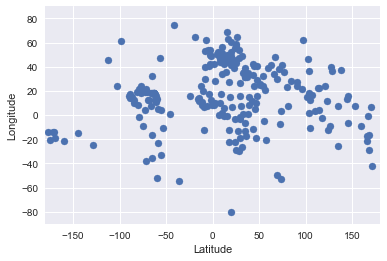

In [3]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [4]:
x=data.iloc[:,1:3]
x.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [5]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.522370559,
 256573.08675934302,
 192194.9829002524,
 152049.69947045774,
 126973.14389753889,
 102891.39703473676,
 84967.41720068289]

Text(0,0.5,'Within cluster sum of squares')

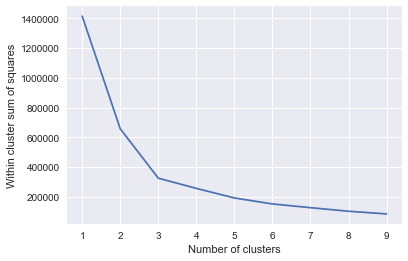

In [6]:
number_cluster = range(1,10)
plt.plot(number_cluster,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')

In [7]:
kmeans = KMeans(5)
kmeans.fit(x)
iden_clusters = kmeans.fit_predict(x)
iden_clusters

array([4, 3, 3, 4, 1, 1, 1, 3, 4, 3, 2, 3, 0, 3, 4, 0, 1, 3, 3, 1, 1, 1,
       0, 1, 3, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 0, 0, 3, 3, 1, 4, 0, 1, 3,
       3, 3, 2, 4, 3, 1, 4, 4, 4, 4, 1, 1, 1, 1, 3, 4, 1, 4, 1, 4, 3, 3,
       1, 1, 3, 1, 0, 4, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 4, 1, 4,
       0, 4, 0, 3, 4, 1, 4, 1, 0, 1, 3, 0, 3, 1, 3, 3, 1, 3, 1, 4, 1, 3,
       0, 3, 3, 3, 3, 0, 4, 4, 0, 1, 3, 0, 3, 1, 1, 4, 1, 3, 3, 1, 1, 1,
       0, 4, 1, 1, 1, 3, 3, 4, 0, 1, 1, 1, 0, 1, 0, 0, 3, 1, 4, 3, 3, 0,
       3, 0, 1, 0, 1, 4, 2, 1, 1, 3, 0, 0, 3, 3, 4, 2, 4, 0, 0, 0, 1, 4,
       0, 1, 4, 3, 2, 3, 1, 0, 3, 1, 3, 3, 3, 1, 0, 4, 1, 0, 1, 4, 1, 3,
       3, 4, 1, 3, 4, 1, 1, 1, 3, 4, 3, 3, 4, 3, 1, 0, 3, 3, 0, 2, 4, 1,
       1, 0, 3, 3, 1, 4, 4, 3, 1, 4, 4, 4, 4, 0, 0, 2, 2, 3, 3, 3, 3])

In [8]:
data_with_cluster = data.copy()
data_with_cluster['Cluster']= iden_clusters
data_with_cluster


,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,4
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,4
4,Albania,20.049834,41.142450,1
5,Aland,19.953288,60.214887,1
6,Andorra,1.560544,42.542291,1
7,United Arab Emirates,54.300167,23.905282,3
8,Argentina,-65.179807,-35.381349,4
9,Armenia,44.929933,40.289526,3


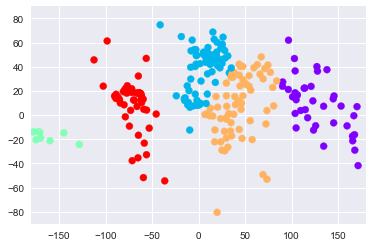

In [11]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c=data_with_cluster['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()